In [45]:
import os
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import iplot
import plotly.express as px
import matplotlib.pyplot as plt



In [46]:
#pip install plotly

In [47]:
# folder path
dir_path = r'.\Data'
# make a temp directory to iterate through
def make_directory(path):
    temp = []
    # Iterate directory
    for i in os.listdir(path):
    # check if current path is a file
        if os.path.isfile(os.path.join(dir_path, i)):
                temp.append(os.path.join(dir_path, i))

    return temp

temp = make_directory(dir_path)

temp

['.\\Data\\basic_ex.csv',
 '.\\Data\\EU_LNG_data.csv',
 '.\\Data\\EU_Stroage_data.csv',
 '.\\Data\\GasFutureHistory_CEGH_VTP_2020.xlsx',
 '.\\Data\\GasFutureHistory_CEGH_VTP_2021.xlsx',
 '.\\Data\\GasFutureHistory_CEGH_VTP_2022.xlsx',
 '.\\Data\\GasFutureHistory_THE_2021.xlsx',
 '.\\Data\\GasFutureHistory_THE_2022.xlsx',
 '.\\Data\\GasSpotHistory_CEGH_VTP_2020.xlsx',
 '.\\Data\\GasSpotHistory_CEGH_VTP_2021.xlsx',
 '.\\Data\\GasSpotHistory_CEGH_VTP_2022.xlsx',
 '.\\Data\\GasSpotHistory_THE_2021.xlsx',
 '.\\Data\\GasSpotHistory_THE_2022.xlsx',
 '.\\Data\\GasSpotHistory_TTF_2019.xlsx',
 '.\\Data\\GasSpotHistory_TTF_2020.xlsx',
 '.\\Data\\GasSpotHistory_TTF_2021.xlsx',
 '.\\Data\\GasSpotHistory_TTF_2022.xlsx',
 '.\\Data\\reverse_data.csv',
 '.\\Data\\Temp_max.xlsx']

In [48]:
#empty dictionary for dataframes
commodity = {}
# Iterate files
df_temp = pd.read_excel('.\\Data\\Temp_max.xlsx')
df_temp['Tmean'] = (df_temp['Tmax'] +df_temp['Tmin'])/2
df_temp['date2'] = df_temp['date'].str[5:]
d = dict(zip(df_temp.date2, df_temp.Tmean))
for file in temp:
    #check if files are Spot market relates
    if 'Spot' in file:
        df = pd.read_excel(file, header = 2, sheet_name= None)
        #dynamicly create keys for dict
        name_WAAP = 'df_WAAP_'+list(df.keys())[3][:4].strip()
        name_DA = 'df_DA_'+list(df.keys())[3][:4].strip()
        #Check if keys already in dict
        if name_WAAP and name_DA not in commodity .keys():
            #create key and value pair for weighted average Price and Spot products
            commodity[name_DA] = df[list(df.keys())[3]].groupby(by=['Trading Date', 'Product']).mean()
            commodity[name_WAAP] = df['EGSI']
        else:
            #if keys already created join dataframes
            commodity [name_WAAP] = pd.concat([commodity [name_WAAP],df['EGSI']], ignore_index=True).sort_values('Trading Date')
            commodity[name_WAAP]['Date'] = commodity[name_WAAP]['Trading Date'].astype(str).str[5:]
            commodity[name_WAAP]['Tmean'] =commodity[name_WAAP]['Date'].map(d)
            commodity [name_DA] = pd.concat([commodity [name_DA],df[list(df.keys())[3]].groupby(by=['Trading Date', 'Product']).mean()], ignore_index=False)

In [49]:
# check if dictoinary is working
commodity.keys()

dict_keys(['df_DA_CEGH', 'df_WAAP_CEGH', 'df_DA_THE', 'df_WAAP_THE', 'df_DA_TTF', 'df_WAAP_TTF'])

In [50]:
commodity ['df_WAAP_TTF'].groupby(by = 'Trading Date').mean()

,Price,Tmean
Trading Date,,
2019-05-17,13.0545,19.390
2019-05-20,13.0600,24.335
2019-05-21,12.6870,24.935
2019-05-22,12.8000,25.930
2019-05-23,12.4410,26.930
...,...,...
2022-12-15,135.4350,12.955
2022-12-16,120.8615,11.300
2022-12-19,107.2450,10.545


''

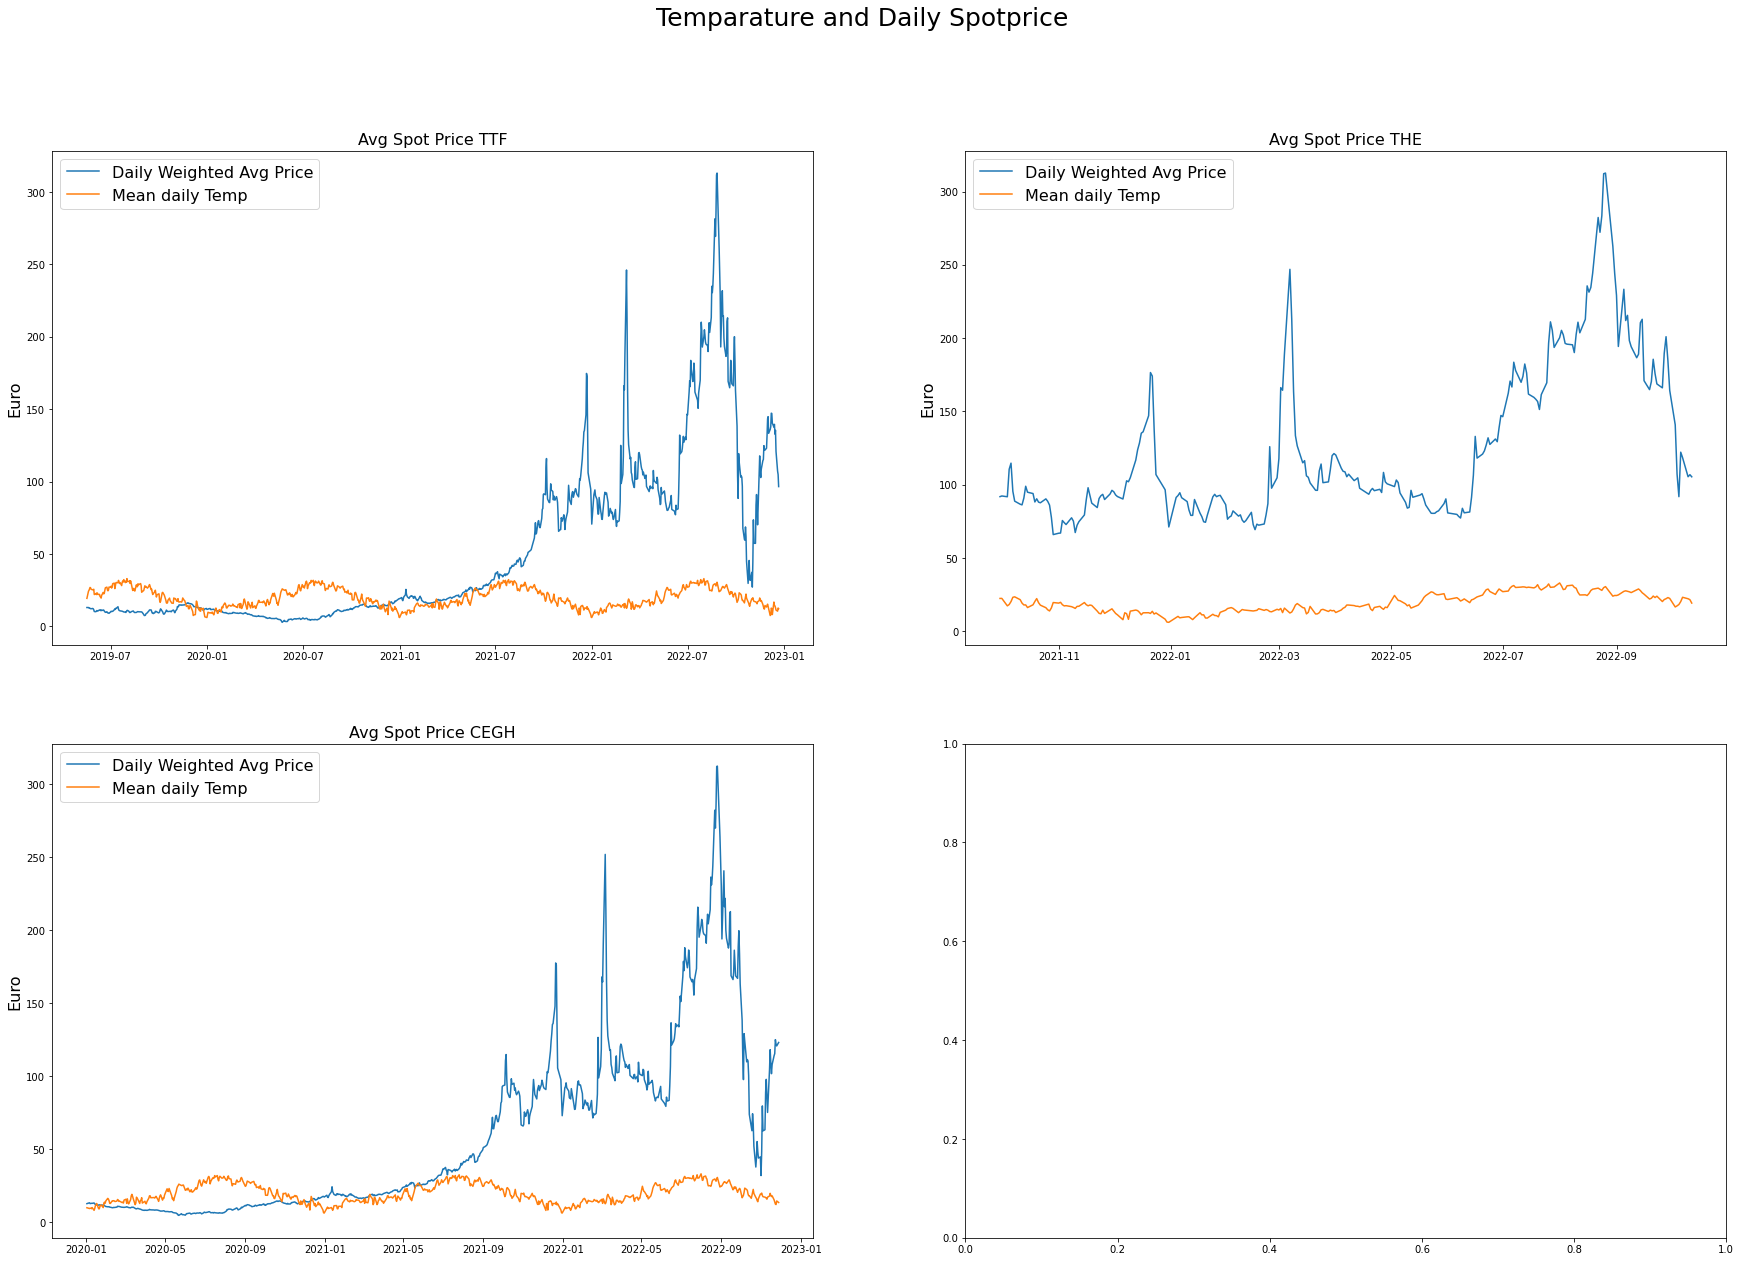

In [51]:

fig, axs = plt.subplots(2, 2, figsize = (30,20))
axs[0, 0].plot(commodity ['df_WAAP_TTF'].groupby(by = 'Trading Date').mean())
axs[0, 0].set_title('Avg Spot Price TTF', fontsize=16)
axs[0,0].legend(['Daily Weighted Avg Price', 'Mean daily Temp'], fontsize=16)
axs[0,0].set_ylabel('Euro', fontsize=16)
axs[0, 1].plot(commodity ['df_WAAP_THE'].groupby(by = 'Trading Date').mean())
axs[0, 1].set_title('Avg Spot Price THE', fontsize=16)
axs[0,1].legend(['Daily Weighted Avg Price', 'Mean daily Temp'], fontsize=16)
axs[0,1].set_ylabel('Euro', fontsize=16)
axs[1, 0].plot(commodity ['df_WAAP_CEGH'].groupby(by = 'Trading Date').mean())
axs[1, 0].set_title('Avg Spot Price CEGH', fontsize=16)
axs[1,0].legend(['Daily Weighted Avg Price', 'Mean daily Temp'], fontsize=16)
axs[1,0].set_ylabel('Euro', fontsize=16)
fig.suptitle('Temparature and Daily Spotprice',fontsize=25)
;

In 2020 Price and Temp seemed to be linked => Temp rose and Prices fell. From 2021-05 Price and Temperature seemed to delink

In [52]:
#rest indexes
commodity['df_DA_CEGH'].reset_index(level=1,inplace = True)
commodity['df_DA_TTF'].reset_index(level=1,inplace = True)
commodity['df_DA_THE'].reset_index(level=1,inplace = True)

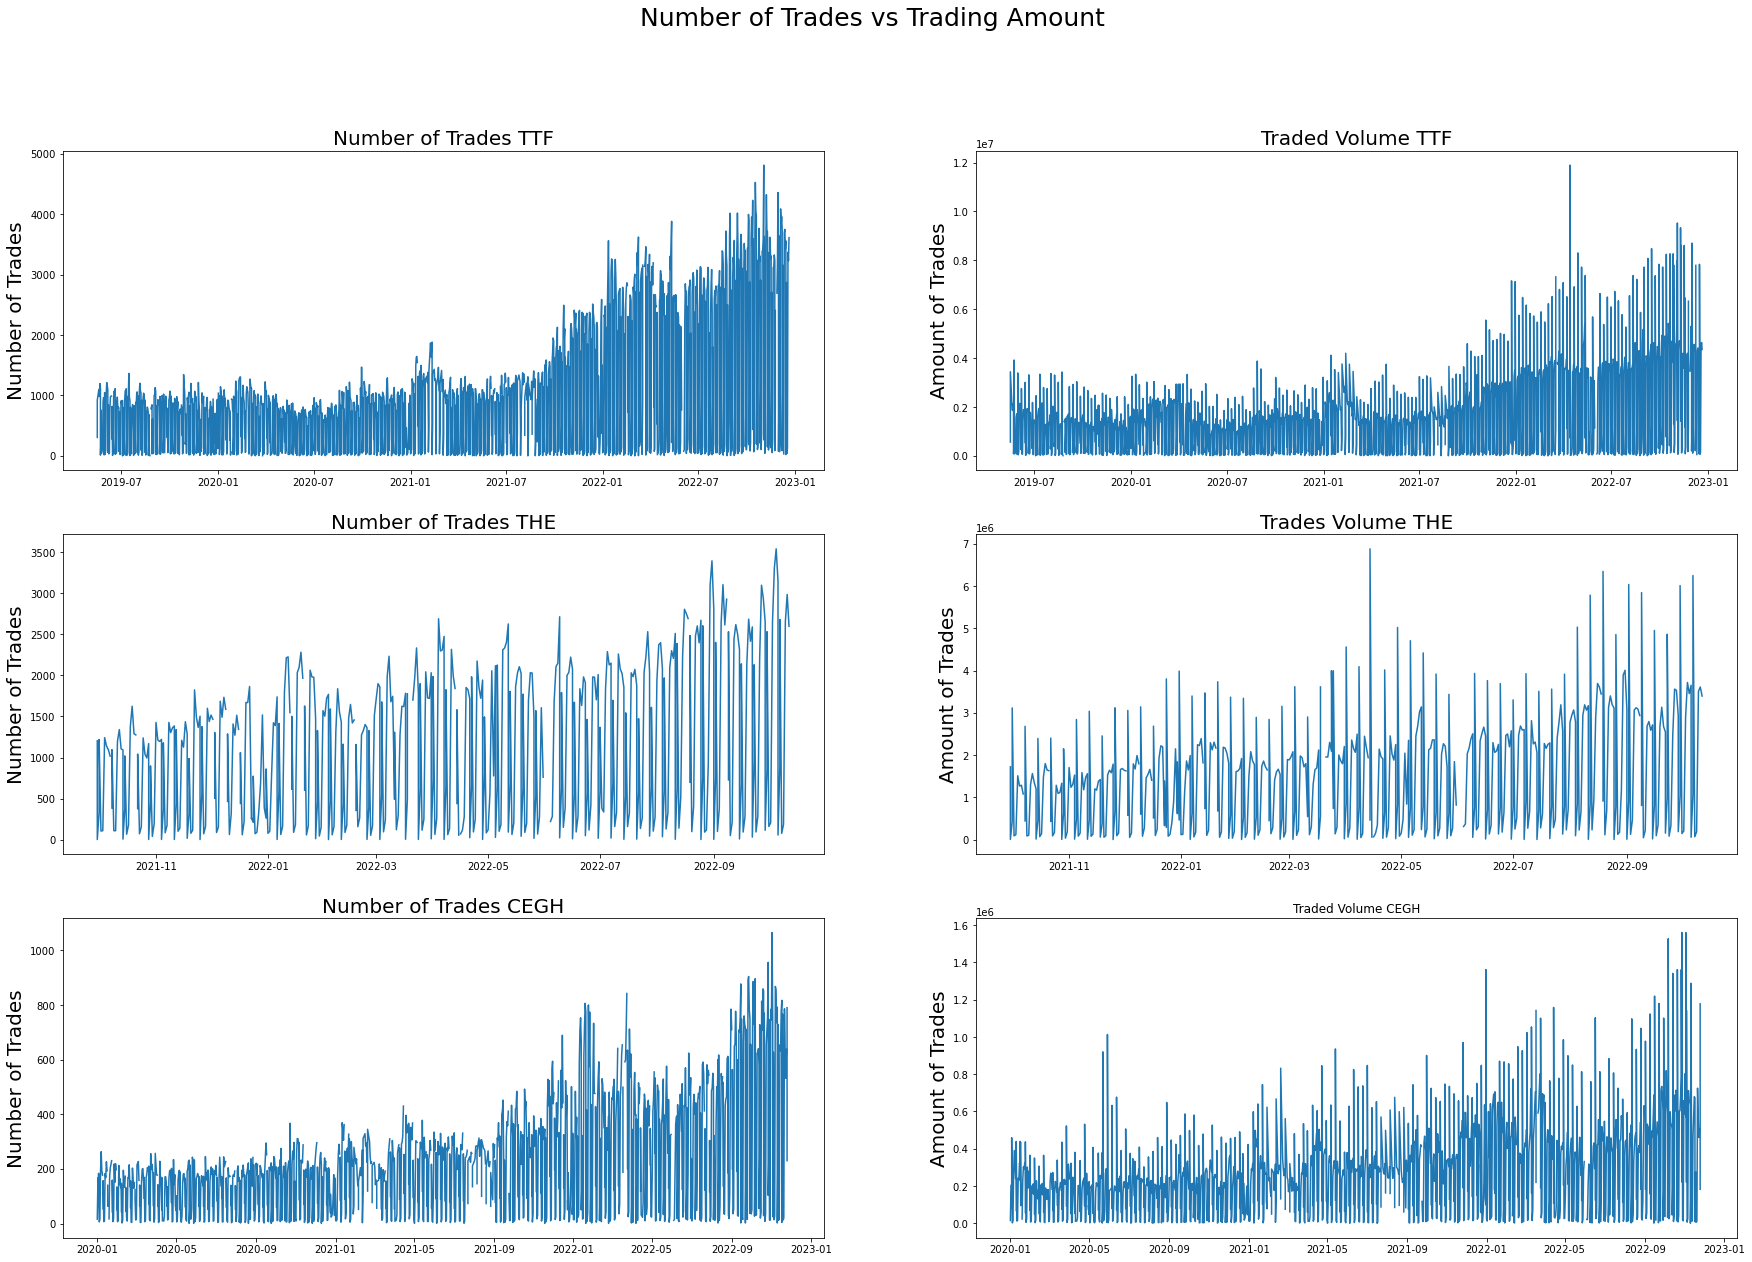

In [53]:

# Plot Visuals to see weather Trading Volume increased in the same amount as Number of Trades
fig, axs = plt.subplots(3, 2, figsize = (30,20))
axs[0, 0].plot(commodity['df_DA_TTF']['Number of Trades'])
axs[0, 0].set_title('Number of Trades TTF', fontsize = 20)
axs[0, 0].set_ylabel('Number of Trades', fontsize = 20)
axs[0, 1].plot(commodity['df_DA_TTF']['Traded Volume'])
axs[0, 1].set_title('Traded Volume TTF', fontsize = 20)
axs[0, 1].set_ylabel('Amount of Trades', fontsize = 20)
axs[1, 0].plot(commodity['df_DA_THE']['Number of Trades'])
axs[1, 0].set_title('Number of Trades THE', fontsize = 20)
axs[1, 0].set_ylabel('Number of Trades', fontsize = 20)
axs[1, 1].plot(commodity['df_DA_THE']['Traded Volume'])
axs[1, 1].set_title('Trades Volume THE', fontsize = 20)
axs[1, 1].set_ylabel('Amount of Trades', fontsize = 20)
axs[2, 0].plot(commodity['df_DA_CEGH']['Number of Trades'])
axs[2, 0].set_title('Number of Trades CEGH', fontsize = 20)
axs[2, 0].set_ylabel('Number of Trades', fontsize = 20)
axs[2, 1].plot(commodity['df_DA_CEGH']['Traded Volume'])
axs[2, 1].set_title('Traded Volume CEGH')
axs[2, 1].set_ylabel('Amount of Trades', fontsize = 20)

fig.suptitle('Number of Trades vs Trading Amount',fontsize=25);

In [54]:
# snapshot  of some relavant market Indices
commodity['df_DA_CEGH'].groupby(by = ['Product'])['Open Price','High Price','Low Price','Last Price'].agg(['mean', 'median', 'std'])

C:\Users\johan\AppData\Local\Temp\ipykernel_17624\1180280175.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



Open Price                     High Price                     \
              mean   median        std       mean  median        std   
Product                                                                
GND1     59.226818  28.2125  60.580179  62.644608  28.725  67.486431   
GWE1     64.155875  38.5000  61.435219  66.494500  41.175  63.940272   

         Low Price                     Last Price                        
              mean   median        std       mean     median        std  
Product                                                                  
GND1     56.751544  27.9250  57.657311  44.096383  18.754167  49.734466  
GWE1     60.044625  35.6875  57.169706  52.418129  21.475000  55.987305

Both Products, i.e. "Day Ahead" (GND1) and "Weekend" (GWE1) had a high spread through out the last two year. This is unsurprising given the Graph in Plot 1

In [55]:
fig = make_subplots(rows=2, cols=2,
                    specs=[[{}, {}],
                           [{"colspan": 2}, None]],
                    subplot_titles=("Product and Price - TTF","Product and Price - THE", "Product and Price - CEGH"),
                    )

fig.add_trace(
    go.Scatter( x=commodity['df_DA_TTF']['Product'],
                y=commodity['df_DA_TTF'][['Open Price','High Price','Low Price','Last Price']].mean(axis= 1),
                mode="markers",
                ),
        row=1, col=1
                )
fig.add_trace(
    go.Scatter( x=commodity['df_DA_THE']['Product'],
                y=commodity['df_DA_THE'][['Open Price','High Price','Low Price','Last Price']].mean(axis= 1),
                mode="markers"),
    row=1, col=2
)
fig.add_trace(
    go.Scatter( x=commodity['df_DA_CEGH']['Product'],
                y=commodity['df_DA_CEGH'][['Open Price','High Price','Low Price','Last Price']].mean(axis= 1),
                mode="markers"),
    row=2, col=1
)
fig.update_layout(
    autosize=False,
    width=800,
    height=600,
    showlegend=False,
    title_text="Product and Price Commodity 2020 - Oktober.2022")
fig['layout']['yaxis']['title']='Price'
fig['layout']['yaxis2']['title']='Price'
fig['layout']['yaxis3']['title']='Price'
fig['layout']['xaxis']['title']='Product'
fig['layout']['xaxis2']['title']='Product'
fig['layout']['xaxis3']['title']='Product'
fig.show()

In [56]:
commodity['df_DA_CEGH'].index.day_name()

Index(['Wednesday', 'Thursday', 'Thursday', 'Friday', 'Friday', 'Saturday',
       'Sunday', 'Monday', 'Tuesday', 'Wednesday',
       ...
       'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Thursday', 'Friday',
       'Friday', 'Saturday', 'Sunday', 'Monday'],
      dtype='object', name='Trading Date', length=1338)

In [57]:
# add a column with Day of the week for late use
commodity['df_DA_CEGH']['weekday'] = commodity['df_DA_CEGH'].index.dayofweek
commodity['df_DA_TTF']['weekday'] = commodity['df_DA_TTF'].index.dayofweek
commodity['df_DA_THE']['weekday'] = commodity['df_DA_THE'].index.dayofweek
#add column with Tilt, i.e. if the price tilted upwards or downwards during the day
commodity['df_DA_CEGH']['Tilt'] = commodity['df_DA_CEGH']['Open Price'] - commodity['df_DA_CEGH']['Last Price']
commodity['df_DA_TTF']['Tilt'] = commodity['df_DA_TTF']['Open Price'] - commodity['df_DA_TTF']['Last Price']
commodity['df_DA_THE']['Tilt'] = commodity['df_DA_THE']['Open Price'] - commodity['df_DA_THE']['Last Price']

In [58]:
#Make yearly dataframes for later use
cegh_2020 = commodity['df_DA_CEGH'][(commodity['df_DA_CEGH'].index > '2020-01-01') & (commodity['df_DA_CEGH'].index <'2020-12-31')]
cegh_2021 = commodity['df_DA_CEGH'][(commodity['df_DA_CEGH'].index > '2021-01-01') & (commodity['df_DA_CEGH'].index <'2021-12-31')]
cegh_2022 = commodity['df_DA_CEGH'][(commodity['df_DA_CEGH'].index > '2022-01-01') & (commodity['df_DA_CEGH'].index <'2022-12-31')]

ttf_2020 = commodity['df_DA_TTF'][(commodity['df_DA_TTF'].index > '2020-01-01') & (commodity['df_DA_TTF'].index <'2020-12-31')]
ttf_2021 = commodity['df_DA_TTF'][(commodity['df_DA_TTF'].index > '2021-01-01') & (commodity['df_DA_TTF'].index <'2021-12-31')]
ttf_2022 = commodity['df_DA_TTF'][(commodity['df_DA_TTF'].index > '2022-01-01') & (commodity['df_DA_TTF'].index <'2022-12-31')]

the_2021 = commodity['df_DA_THE'][(commodity['df_DA_THE'].index > '2021-01-01') & (commodity['df_DA_THE'].index <'2021-12-31')]
the_2022 = commodity['df_DA_THE'][(commodity['df_DA_THE'].index > '2022-01-01') & (commodity['df_DA_THE'].index <'2022-12-31')]

In [59]:
# Make a Plot that show which day of the week had the most trades done. (Weekday 0 = Monday)
fig = make_subplots(rows=3, cols=3,
                    #specs=[[{}, {}],
                    #[{"colspan": 1}, None]],
                    subplot_titles=("CEGH 2020","TTF 2020","THE 2020", "2021","2021","2021","2022","2022","2022"))
#plot subplots for all commoditiy markets and years. This could have been a loop
fig.add_trace(
    go.Bar( x=cegh_2020.groupby(by = ['weekday'])['Number of Trades'].mean().index,
            y=cegh_2020.groupby(by = ['weekday'])['Number of Trades'].mean(),
            ),
    row=1, col=1
)
fig.add_trace(
    go.Bar( x=cegh_2021.groupby(by = ['weekday'])['Number of Trades'].mean().index,
            y=cegh_2021.groupby(by = ['weekday'])['Number of Trades'].mean(),
            ),
    row=2, col=1
)
fig.add_trace(
    go.Bar( x=cegh_2022.groupby(by = ['weekday'])['Number of Trades'].mean().index,
            y=cegh_2022.groupby(by = ['weekday'])['Number of Trades'].mean(),
            ),
    row=3, col=1
)

fig.add_trace(
    go.Bar( x=ttf_2020.groupby(by = ['weekday'])['Number of Trades'].mean().index,
            y=ttf_2020.groupby(by = ['weekday'])['Number of Trades'].mean(),
            ),
    row=1, col=2
)
fig.add_trace(
    go.Bar( x=ttf_2021.groupby(by = ['weekday'])['Number of Trades'].mean().index,
            y=ttf_2021.groupby(by = ['weekday'])['Number of Trades'].mean(),
            ),
    row=2, col=2
)
fig.add_trace(
    go.Bar( x=ttf_2022.groupby(by = ['weekday'])['Number of Trades'].mean().index,
            y=ttf_2022.groupby(by = ['weekday'])['Number of Trades'].mean(),
            ),
    row=3, col=2
)


fig.add_trace(
    go.Bar( x=the_2021.groupby(by = ['weekday'])['Number of Trades'].mean().index,
            y=the_2021.groupby(by = ['weekday'])['Number of Trades'].mean(),
            ),
    row=2, col=3
)
fig.add_trace(
    go.Bar( x=the_2022.groupby(by = ['weekday'])['Number of Trades'].mean().index,
            y=the_2022.groupby(by = ['weekday'])['Number of Trades'].mean(),
            ),
    row=3, col=3
)
fig.update_layout(
    autosize=False,
    width=1000,
    height=1000,
    showlegend=False,
    title_text="Distribution of Trades per Weekday 2020 - Oktober.2022",
    )
#name the first axis
fig['layout']['yaxis']['title']='Price'
fig['layout']['xaxis']['title']='Weekday'
#name the others starting with 2
for i in range(2,10):
    fig['layout'][f'yaxis{i}']['title']='Price'
    fig['layout'][f'xaxis{i}']['title']='Weekday'

fig.show()

All commodity markets had their strongest trading day thoughout the first 3 Day of the week. interestingly the through 2021 and 2022 the later weekdays bekame weaker. Suggesting that either with higher Volumes and Trades in those years, more traders supplied their demand earlier in the week.

In [60]:
# make some Boxplots for commodity markets and year
fig = make_subplots(rows=3, cols=3,
                    #specs=[[{}, {}],
                    #[{"colspan": 1}, None]],
                    subplot_titles=("CEGH 2020","TTF 2020","THE 2020", "2021","2021","2021","2022","2022","2022"))

fig.add_trace(
    go.Box( x=cegh_2020['weekday'],
            y=cegh_2020[['Open Price','High Price','Low Price','Last Price']].mean(axis= 1),
            ),
    row=1, col=1
)
fig.add_trace(
    go.Box( x=cegh_2021['weekday'],
            y=cegh_2021[['Open Price','High Price','Low Price','Last Price']].mean(axis= 1),
            ),
    row=2, col=1
)
fig.add_trace(
    go.Box( x=cegh_2022['weekday'],
            y=cegh_2022[['Open Price','High Price','Low Price','Last Price']].mean(axis= 1),
            ),
    row=3, col=1
)

fig.add_trace(
    go.Box( x=ttf_2020['weekday'],
            y=ttf_2020[['Open Price','High Price','Low Price','Last Price']].mean(axis= 1),
            ),
    row=1, col=2
)
fig.add_trace(
    go.Box( x=ttf_2021['weekday'],
            y=ttf_2021[['Open Price','High Price','Low Price','Last Price']].mean(axis= 1),
            ),
    row=2, col=2
)
fig.add_trace(
    go.Box( x=ttf_2022['weekday'],
            y=ttf_2022[['Open Price','High Price','Low Price','Last Price']].mean(axis= 1),
            ),
    row=3, col=2
)


fig.add_trace(
    go.Box( x=the_2021['weekday'],
            y=the_2021[['Open Price','High Price','Low Price','Last Price']].mean(axis= 1),
            ),
    row=2, col=3
)
fig.add_trace(
    go.Box( x=the_2022['weekday'],
            y=the_2022[['Open Price','High Price','Low Price','Last Price']].mean(axis= 1),
            ),
    row=3, col=3
)
fig.update_layout(
    autosize=False,
    width=1000,
    height=1000,
    showlegend=False,
    title_text="Distribution of Price Commodity per Weekday 2020 - Oktober.2022")

#name the first axis
fig['layout']['yaxis']['title']='Price'
fig['layout']['xaxis']['title']='Weekday'
#name the others starting with 2
for i in range(2,10):
    fig['layout'][f'yaxis{i}']['title']='Price'
    fig['layout'][f'xaxis{i}']['title']='Weekday'
fig.show()

The price range from 2020 to 2021 almost ten-folded and again doubeled in 2022. In 2021 THE opened so its not a surprise that prices fluctuated here.
Interestingly medians for 2021 and 2022 were in the lower side - suggesting a price increase for only some parts of the year. We must also consider weather different producttypes had differend spreads

In [61]:
fig = make_subplots(rows=3, cols=3,
                    #specs=[[{}, {}],
                    #[{"colspan": 1}, None]],
                    subplot_titles=("CEGH 2020","TTF 2020","THE 2020", "2021","2021","2021","2022","2022","2022"))

fig.add_trace(
    go.Box( x=cegh_2020['Product'],
            y=cegh_2020[['Open Price','High Price','Low Price','Last Price']].mean(axis= 1),
            ),
    row=1, col=1
)
fig.add_trace(
    go.Box( x=cegh_2021['Product'],
            y=cegh_2021[['Open Price','High Price','Low Price','Last Price']].mean(axis= 1),
            ),
    row=2, col=1
)
fig.add_trace(
    go.Box( x=cegh_2022['Product'],
            y=cegh_2022[['Open Price','High Price','Low Price','Last Price']].mean(axis= 1),
            ),
    row=3, col=1
)

fig.add_trace(
    go.Box( x=ttf_2020['Product'],
            y=ttf_2020[['Open Price','High Price','Low Price','Last Price']].mean(axis= 1),
            ),
    row=1, col=2
)
fig.add_trace(
    go.Box( x=ttf_2021['Product'],
            y=ttf_2021[['Open Price','High Price','Low Price','Last Price']].mean(axis= 1),
            ),
    row=2, col=2
)
fig.add_trace(
    go.Box( x=ttf_2022['Product'],
            y=ttf_2022[['Open Price','High Price','Low Price','Last Price']].mean(axis= 1),
            ),
    row=3, col=2
)


fig.add_trace(
    go.Box( x=the_2021['Product'],
            y=the_2021[['Open Price','High Price','Low Price','Last Price']].mean(axis= 1),
            ),
    row=2, col=3
)
fig.add_trace(
    go.Box( x=the_2022['Product'],
            y=the_2022[['Open Price','High Price','Low Price','Last Price']].mean(axis= 1),
            ),
    row=3, col=3
)
fig.update_layout(
    autosize=False,
    width=1000,
    height=1000,
    showlegend=False,
    title_text="Distribution of Product and Price 2020 - Oktober.2022")

#name the first axis
fig['layout']['yaxis']['title']='Price'
fig['layout']['xaxis']['title']='Product'
#name the others starting with 2
for i in range(2,10):
    fig['layout'][f'yaxis{i}']['title']='Price'
    fig['layout'][f'xaxis{i}']['title']='Product'
fig.show()

Suprisingsly weekend products seem to be more stable. (Samler Pricerange) Suggesting that longer times are either not seen as risk (weekendproducts a delivered over a 2 Day priode; GND1 over 1) or not adequatly priced in. Probably the first one

In [62]:
# Make barplots to see how often prices fell and how often they rose thoughout the day.

fig = make_subplots(rows=3, cols=3,
                    #specs=[[{}, {}],
                    #[{"colspan": 1}, None]],
                    subplot_titles=("CEGH 2020","TTF 2020","THE 2020", "2021","2021","2021","2022","2022","2022"))

fig.add_trace(
    go.Bar( x=['Preis gefallen','Preis gestielen'],
            y= [len(cegh_2020[(cegh_2020['Tilt'] <= 0 )]), len(cegh_2020[(cegh_2020['Tilt'] > 0 )])],
            ),
    row=1, col=1
)
fig.add_trace(
    go.Bar( x=['Preis gefallen','Preis gestielen'],
            y= [len(cegh_2021[(cegh_2021['Tilt'] <= 0 )]), len(cegh_2021[(cegh_2021['Tilt'] > 0 )])],
            ),
    row=2, col=1
)
fig.add_trace(
    go.Bar( x=['Preis gefallen','Preis gestielen'],
            y= [len(cegh_2022[(cegh_2022['Tilt'] <= 0 )]), len(cegh_2022[(cegh_2022['Tilt'] > 0 )])],
            ),
    row=3, col=1
)

fig.add_trace(
    go.Bar( x=['Preis gefallen','Preis gestielen'],
            y= [len(ttf_2020[(ttf_2020['Tilt'] <= 0 )]), len(ttf_2020[(ttf_2020['Tilt'] > 0 )])],
            ),
    row=1, col=2
)
fig.add_trace(
    go.Bar( x=['Preis gefallen','Preis gestielen'],
            y= [len(ttf_2021[(ttf_2021['Tilt'] <= 0 )]), len(ttf_2021[(ttf_2021['Tilt'] > 0 )])],
            ),
    row=2, col=2
)
fig.add_trace(
    go.Bar( x=['Preis gefallen','Preis gestielen'],
            y= [len(ttf_2022[(ttf_2022['Tilt'] <= 0 )]), len(ttf_2022[(ttf_2022['Tilt'] > 0 )])],
            ),
    row=3, col=2
)


fig.add_trace(
    go.Bar( x=['Preis gefallen','Preis gestielen'],
            y= [len(the_2021[(the_2021['Tilt'] <= 0 )]), len(the_2021[(the_2021['Tilt'] > 0 )])],
            ),
    row=2, col=3
)
fig.add_trace(
    go.Bar( x=['Preis gefallen','Preis gestielen'],
            y= [len(the_2022[(the_2022['Tilt'] <= 0 )]), len(the_2022[(the_2022['Tilt'] > 0 )])],
            ),
    row=3, col=3
)
fig.update_layout(
    autosize=False,
    width=1000,
    height=1000,
    showlegend=False,
    title_text="Distribution of Trades per Weekday 2020 - Oktober.2022")

#name the first axis
fig['layout']['yaxis']['title']='# days price moved'
#name the others starting with 2
for i in range(2,10):
    fig['layout'][f'yaxis{i}']['title']='# days price moved'

fig.show()

until 2022 prices fell thoughout the day more often then not, meaning you should have bought later in the day. this reversed in 2022

## Are there correlations between LNG, Storage and Gasprice

In [63]:
# Read in the data from the CSV file
df_stor = pd.read_csv('./Data/EU_Stroage_data.csv', index_col= 0)

# filter out all rows with "eu" & "UA" as their country code
df_stor = df_stor[df_stor["code"] != 'eu']
df_stor = df_stor[df_stor["code"] != 'UA']

# change Datatype of column
df_stor[['workingGasVolume', 'injection', 'gasInStorage','full', 'trend']]=df_stor[['workingGasVolume', 'injection', 'gasInStorage','full', 'trend']].astype(float)

In [64]:
df_lng = pd.read_csv('./Data/reverse_data.csv')
df_lng.drop(['Unnamed: 0.1', 'Unnamed: 0'],axis=1, inplace= True)
#df_lng = df_lng[::-1]
df_lng.head()

,name,code,url,gasDayStart,inventory,sendOut,dtmi,dtrs,info,status,percentage Inventory to DTMI,percentage sendOut of DTRS
0,Belgium,BE,BE,2022-12-02,6.261448,268.6,6.5656,541.0,[],C,95.367491,49.648799
1,Belgium,BE,BE,2022-12-01,6.475352,339.5,6.5656,541.0,[],C,98.625442,62.754159
2,Belgium,BE,BE,2022-11-30,3.970796,466.9,6.5656,541.0,[],C,60.478799,86.303142
3,Belgium,BE,BE,2022-11-29,2.396328,487.3,6.5656,541.0,[],C,36.498233,90.073937
4,Belgium,BE,BE,2022-11-28,4.743588,509.6,6.5656,541.0,[],C,72.249117,94.195933


In [95]:
# Creat a Dataframe for correlation calculatio
df_corr = pd.DataFrame()

df_corr['sendout'] =  df_lng.groupby('gasDayStart')['percentage sendOut of DTRS'].mean()
df_corr['injection'] = df_stor.groupby('gasDayStart')['injection'].mean()

In [96]:
# Creat a dataframe to get a mean EU Price
df_com = pd.DataFrame()

df_com['TTF'] = commodity['df_WAAP_TTF'].groupby('Trading Date')['Price'].mean()
df_com['CEGH'] = commodity['df_WAAP_CEGH'].groupby('Trading Date')['Price'].mean()
df_com['THE'] = commodity['df_WAAP_THE'].groupby('Trading Date')['Price'].mean()
df_com['Mean'] = df_com[['TTF', 'THE', 'CEGH']].mean(axis=1)
#create a dictionary to map to df_cor
d = df_com[(df_com.index > '2022-02-05') & (df_com.index < '2022-11-28')]['Mean'].to_dict()
df_corr['price'] = df_corr.index.map(d)
df_corr.dropna(inplace=True)
df_corr.corr()

,sendout,injection,price
sendout,1.000000,0.418314,0.037767
injection,0.418314,1.000000,0.289085
price,0.037767,0.289085,1.000000
